<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

We will import the following libraries for the lab


In [111]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data

from sklearn import preprocessing 
from sklearn.preprocessing import  StandardScaler,MinMaxScaler, RobustScaler, Normalizer

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

This function is to plot the confusion matrix.


In [112]:
def plot_confusion_matrix(y, y_predict, normalize=False):
	"""
	Esta función grafica la matriz de confusión.
	Si normalize=True, muestra proporciones en vez de conteos.
	
	Parámetros:
	y -- etiquetas verdaderas
	y_predict -- etiquetas predichas por el modelo
	normalize -- si es True, normaliza la matriz para mostrar proporciones
	"""
	# Calcula la matriz de confusión, normalizada si se solicita
	cm = confusion_matrix(y, y_predict, normalize='true' if normalize else None)
	ax = plt.subplot()
	
	# El parámetro fmt define el formato de los números en las celdas:
	# '.2f' muestra dos decimales (para proporciones), 'd' muestra enteros (para conteos)
	fmt = '.2f' if normalize else 'd'
	
	# Grafica la matriz de confusión como un mapa de calor
	sns.heatmap(cm, annot=True, ax=ax, cmap=plt.cm.Blues, linecolor="white", linewidth=1, fmt=fmt)
	ax.set_xlabel('Predicted labels')  # Etiqueta del eje x
	ax.set_ylabel('True labels')       # Etiqueta del eje y
	ax.set_title('Confusion Matrix' + (' (Normalized)' if normalize else ''))  # Título
	ax.xaxis.set_ticklabels(['did not land', 'land'])      # Etiquetas eje x
	ax.yaxis.set_ticklabels(['did not land', 'landed'])    # Etiquetas eje y
	plt.tight_layout()  # Ajusta el diseño para que no se sobrepongan los elementos
	plt.show()          # Muestra la gráfica

## Load the dataframe


Load the data


In [113]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [114]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [115]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [116]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [117]:
Y=data["Class"].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [118]:
# Crear una instancia del escalador
scaler = StandardScaler()

# transformar X (estandarizar todos los valores)
X = scaler.fit_transform(X)


#### Nota Opcional

In [119]:
# El resultado de fit_transform es un NumPy array, no un DataFrame de pandas.
# Si quieres mantenerlo como DataFrame y conservar los nombres de las columnas:
# X_e = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
# X_df = pd.DataFrame(scaler.fit_transform(X), columns=X_e.columns)
# X_df


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)



we can see we only have 18 test samples.


In [121]:
print(X_test.shape[0],Y_test.shape[0])

18 18


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [122]:
# Definimos el diccionario de hiperparámetros para la regresión logística.
# 'C': fuerza de regularización (valores más pequeños especifican una regularización más fuerte)
# 'penalty': tipo de penalización (l2 = ridge)
# 'solver': algoritmo para optimización (lbfgs es eficiente para conjuntos de datos pequeños)
parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}  # l1 lasso, l2 ridge

# Creamos el objeto de regresión logística
lr = LogisticRegression()

# Creamos el objeto GridSearchCV para buscar los mejores hiperparámetros usando validación cruzada de 5 pliegues
grid = GridSearchCV(lr, parameters, cv=5,n_jobs=-1)

# Ajustamos el modelo a los datos de entrenamiento para encontrar los mejores hiperparámetros
grid.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [123]:
print(f'tuned hpyerparameters :(best parameters) {grid.best_params_}')
print(f'accuracy : {grid.best_score_}')

tuned hpyerparameters :(best parameters) {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8342857142857143


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [124]:
print(f'acurracy test data : {grid.score(X_test,Y_test)}')

acurracy test data : 0.8333333333333334


Lets look at the confusion matrix:


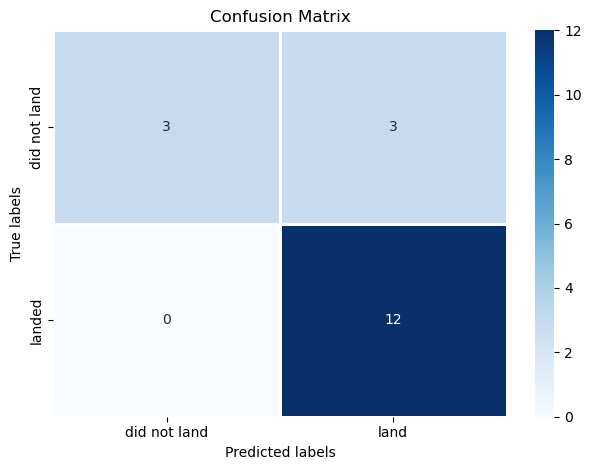

In [125]:
y_hat_predict=grid.predict(X_test)
plot_confusion_matrix(Y_test,y_hat_predict,)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [126]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [127]:
svm_cv=GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [128]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [129]:
# svm.predict(X_test)
print("accuracy test data : ",svm_cv.score(X_test,Y_test))

accuracy test data :  0.8333333333333334


We can plot the confusion matrix


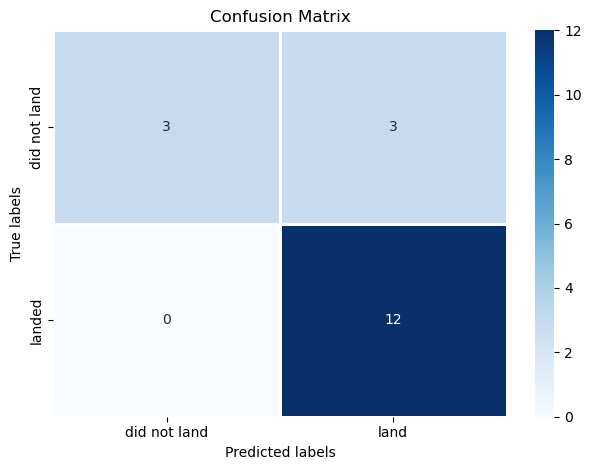

In [130]:
yhat_confusion=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_confusion)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [131]:
# Definimos el diccionario de hiperparámetros para el árbol de decisión.
parameters = {
	# 'criterion': Función para medir la calidad de una división.
	#   - 'gini': utiliza el índice de Gini, que mide la impureza de un nodo (0 es puro).
	#   - 'entropy': utiliza la entropía de la información (basada en la teoría de la información de Shannon).
	'criterion': ['gini', 'entropy'],
	
	# 'splitter': Estrategia utilizada para dividir cada nodo.
	#   - 'best': elige la mejor división posible.
	#   - 'random': elige la mejor división entre un subconjunto aleatorio de características.
	'splitter': ['best', 'random'],
	
	# 'max_depth': Profundidad máxima del árbol. Limita el número de niveles para evitar sobreajuste.
	#   np.arange(2,20,2) genera una lista de valores desde 2 hasta 18 en pasos de 2.
	'max_depth': np.arange(2, 20, 2).tolist(),
	
	# 'max_features': Número máximo de características a considerar para encontrar la mejor división.
	#   - 'sqrt': usa la raíz cuadrada del número total de características.
	'max_features': ['sqrt'],
	
	# 'min_samples_leaf': Número mínimo de muestras requeridas para estar en una hoja.
	#   - Valores bajos pueden llevar a sobreajuste, valores altos a subajuste.
	'min_samples_leaf': [1, 2, 4],
	
	# 'min_samples_split': Número mínimo de muestras requeridas para dividir un nodo interno.
	#   - Si el número de muestras en un nodo es menor que este valor, no se divide.
	'min_samples_split': [2, 5, 10]
}

# Creamos el clasificador de árbol de decisión.
tree = DecisionTreeClassifier()

In [132]:
# Creamos el objeto GridSearchCV para el árbol de decisión con validación cruzada de 10 pliegues
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Ajustamos el modelo a los datos de entrenamiento para encontrar los mejores hiperparámetros
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [133]:
# Mostramos los mejores hiperparámetros encontrados por GridSearchCV para el árbol de decisión
print("tuned hpyerparameters :(best parameters) ", tree_cv.best_params_)

# Mostramos la precisión promedio obtenida durante la validación cruzada (conjunto de entrenamiento)
print("accuracy :", tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8642857142857142


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [134]:
# Calculamos la precisión (accuracy) del clasificador de árbol de decisión optimizado (tree_cv)
# sobre los datos de prueba (X_test, Y_test).
# El método score devuelve la fracción de predicciones correctas.
tree_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


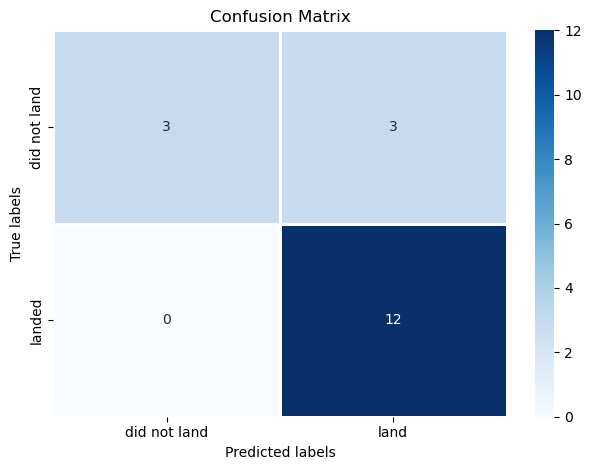

In [135]:
# Usamos el modelo optimizado de árbol de decisión (tree_cv) para predecir las clases del conjunto de prueba (X_test)
yhat = tree_cv.predict(X_test)

# Graficamos la matriz de confusión para comparar las etiquetas verdaderas (Y_test) con las predichas (yhat)
# Esto nos permite visualizar el desempeño del modelo en términos de verdaderos positivos, falsos positivos, etc.
plot_confusion_matrix(Y_test, yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [136]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [137]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [138]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [139]:
print("accuracy test data : ",knn_cv.score(X_test,Y_test))

accuracy test data :  0.8333333333333334


We can plot the confusion matrix


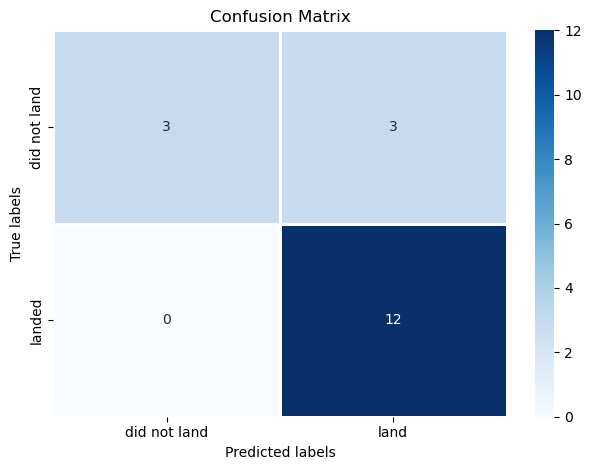

In [140]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [141]:
# Comparar el accuracy en los datos de test de cada modelo
test_results = {
	"Logistic Regression": grid.score(X_test, Y_test),
	"SVM": svm_cv.score(X_test, Y_test),
	"Decision Tree": tree_cv.score(X_test, Y_test),
	"KNN": knn_cv.score(X_test, Y_test)
}

# Imprimir los resultados
for model, score in test_results.items():
	print(f"{model}: {score:.4f}")

# Encontrar el mejor modelo según el accuracy en test
best_model_test = max(test_results, key=test_results.get)
print(f"\nMejor modelo en test: {best_model_test} con accuracy {test_results[best_model_test]:.4f}")

Logistic Regression: 0.8333
SVM: 0.8333
Decision Tree: 0.8333
KNN: 0.8333

Mejor modelo en test: Logistic Regression con accuracy 0.8333


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
